## Importing the pandas library and imporing the housing data into the panda;s dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Housing_Data = pd.read_csv('housingData.csv')

In [3]:
# Housing_Data.info()

## Calculating the percentage of missing values is essential for identifying variables with the most substantial gaps in data.

In [4]:
missing_count=Housing_Data.isnull().sum()
missing_percentage=(missing_count/len(Housing_Data))*100
missing_data_summary=pd.DataFrame({'Column Name':missing_count.index,'Missing Count':missing_count.values,
                                   'Missing Percentage':missing_percentage.values})
missing_data_summary=missing_data_summary[missing_data_summary['Missing Count']>0]
print(missing_data_summary)

     Column Name  Missing Count  Missing Percentage
3    LotFrontage            207                20.7
5          Alley            938                93.8
21    MasVnrType              4                 0.4
22    MasVnrArea              4                 0.4
26      BsmtQual             31                 3.1
27      BsmtCond             31                 3.1
28  BsmtExposure             32                 3.2
29  BsmtFinType1             31                 3.1
31  BsmtFinType2             32                 3.2
38    Electrical              1                 0.1
53   FireplaceQu            466                46.6
54    GarageType             53                 5.3
55   GarageYrBlt             53                 5.3
56  GarageFinish             53                 5.3
59    GarageQual             53                 5.3
60    GarageCond             53                 5.3
66        PoolQC            998                99.8
67         Fence            805                80.5
68   MiscFea

## Missing Value Visualization

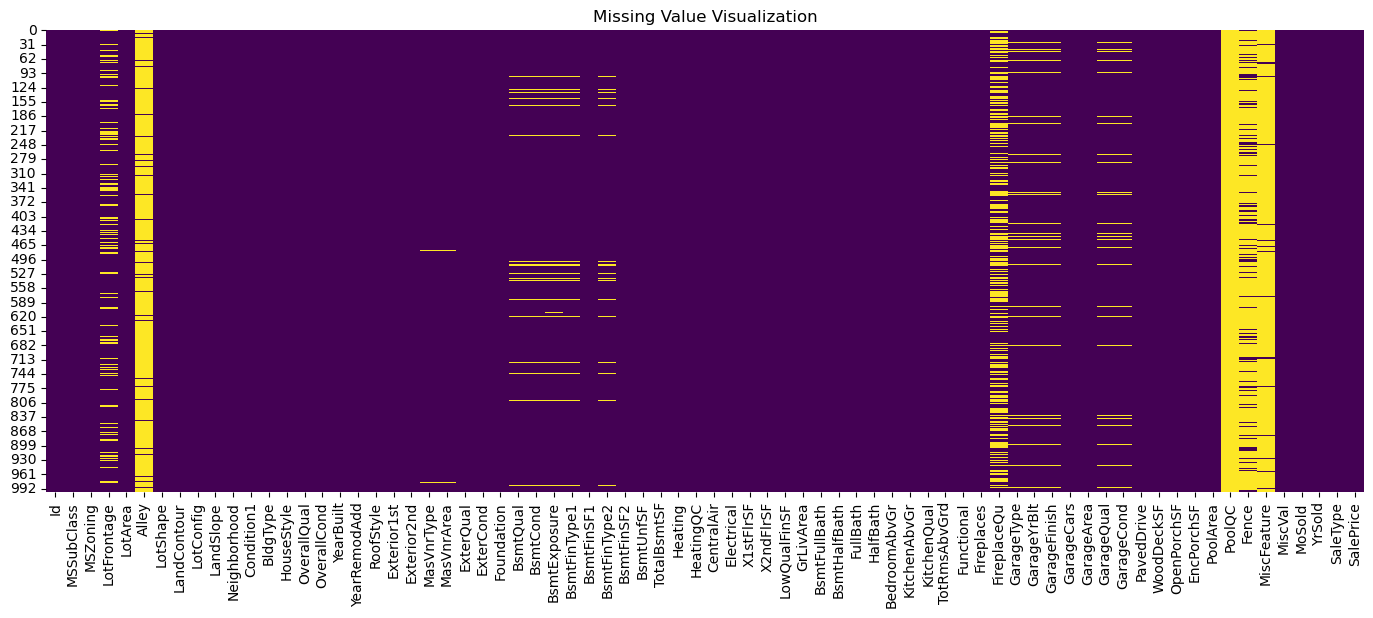

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
missing_data = Housing_Data.isnull()
plt.figure(figsize = (17, 6))
sns.heatmap(data = missing_data,
           cmap = 'viridis', cbar = False)
plt.title('Missing Value Visualization')
plt.show()

## Removing any varible with more than 20% missing values

In [6]:
# Drop column 'LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature',
Housing_Data = Housing_Data.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC','Fence',
                                  'MiscFeature', 'Alley'], axis=1) 

## Eliminating non-significant features from our model.

In [7]:
Housing_Data = Housing_Data.drop(['Id', 'MSSubClass', 'GarageYrBlt', 'MiscVal', 'YrSold', 'YearBuilt', 
                                  'MoSold', 'YearRemodAdd','MasVnrArea'], axis=1) 

In [8]:
missing_count=Housing_Data.isnull().sum()
missing_percentage=(missing_count/len(Housing_Data))*100
missing_data_summary=pd.DataFrame({'Column Name':missing_count.index,'Missing Count':missing_count.values,'Missing Percentage':missing_percentage.values})
missing_data_summary=missing_data_summary[missing_data_summary['Missing Count']>0]
print(missing_data_summary)

     Column Name  Missing Count  Missing Percentage
15    MasVnrType              4                 0.4
19      BsmtQual             31                 3.1
20      BsmtCond             31                 3.1
21  BsmtExposure             32                 3.2
22  BsmtFinType1             31                 3.1
24  BsmtFinType2             32                 3.2
31    Electrical              1                 0.1
46    GarageType             53                 5.3
47  GarageFinish             53                 5.3
50    GarageQual             53                 5.3
51    GarageCond             53                 5.3


As we can see from the percent of missing values below, we have only 13 varaible with missing value

## Dealing with missing values - Mean value imputation

In [9]:
# List of the 13 variables with missing values
variables_with_missing = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                          'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 
                          'GarageCond']

# Impute missing values
for variable in variables_with_missing:
    if Housing_Data[variable].dtype == 'float64':
        # For numeric variables, impute with the mean
        mean_value = Housing_Data[variable].mean()
        Housing_Data[variable].fillna(mean_value, inplace=True)
    else:
        # For categorical variables, impute with the mode (most frequent category)
        mode_value = Housing_Data[variable].mode()[0]
        Housing_Data[variable].fillna(mode_value, inplace=True)

## Encoding Categorical Variables:

## Scaling and Normalization:
Even though there are several data tranformation that can be used to enhance data quality for modeling purpose, 
we examine a few of them based on our Housing_Data dataset.
For this purpose first we will plot histogram of all out numberic data and then via visual inspections, we 
identify variables that are highly skewed (not symeteric and far from normal distribution). To accomplish this 
we used Log Transformation to make our data to be more normally distributed.


Scaling and normalization are important for numerical variables to ensure that their values are on a similar scale. Scikit-Learn provides tools like StandardScaler and MinMaxScaler for this purpose.

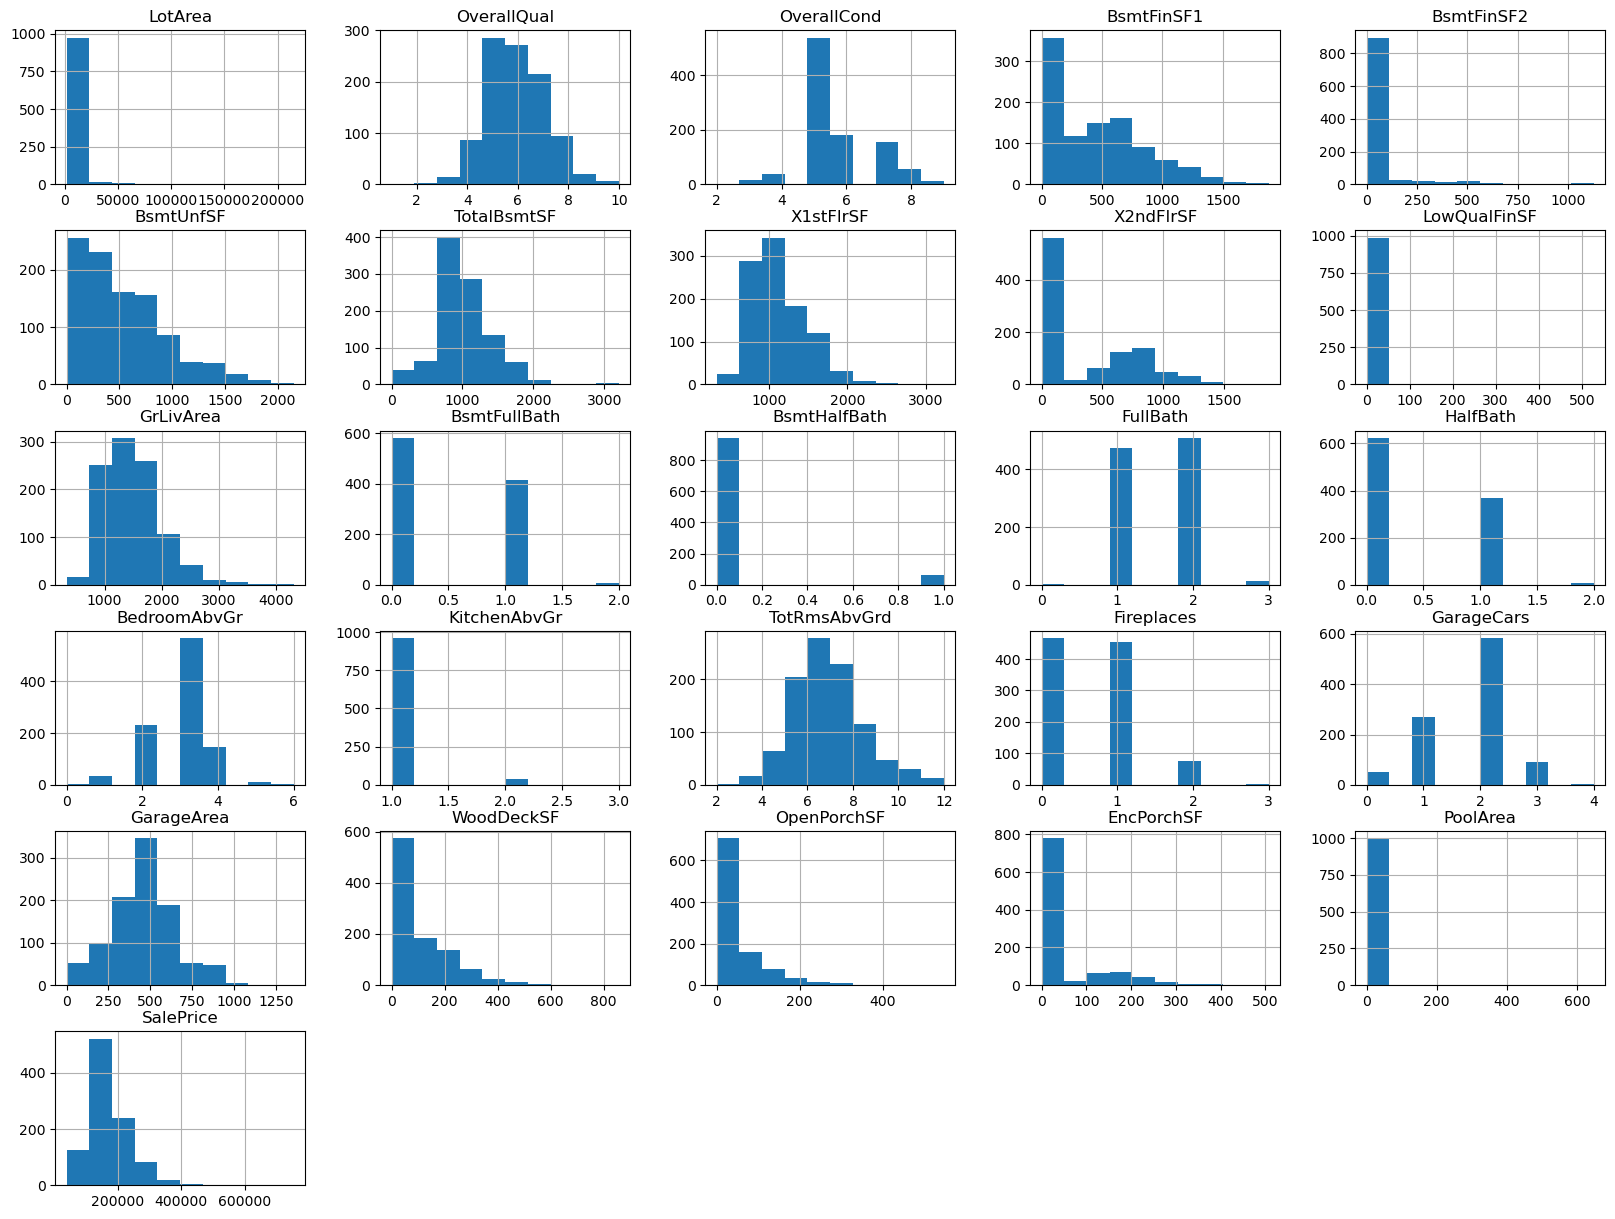

In [10]:
Housing_Data.hist(figsize = (20, 15))
plt.show()

As we can observe from the above histograms, all vraibles are skewed either to the right or to the left hence  need transformation.

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

NameError: name 'data' is not defined

## Feature Engineering:

Feature engineering involves creating new features or transforming existing ones to improve model performance. You can use Pandas to create new columns based on existing data.

data['new_feature'] = data['feature1'] + data['feature2']

In [ ]:
# Calculate the age of the house
Housing_Data['age'] = Housing_Data['YrSold'] - Housing_Data['YearBuilt']

# Calculate the age since remodeling
Housing_Data['ageSinceRemodel'] = Housing_Data['YrSold'] - Housing_Data['YearRemodAdd']

# Calculate the age of the garage
Housing_Data['ageofGarage'] = Housing_Data.apply(
    lambda row: row['YrSold'] - row['GarageYrBlt'] if not pd.isna(row['GarageYrBlt']) else row['age'], axis=1)

# Select the final columns to retain
columns_to_keep = ['age', 'ageSinceRemodel', 'ageofGarage'] + list(Housing_Data.columns.difference(['Id', 'MSSubClass', 'LotFrontage', 'GarageYrBlt', 'MiscVal', 'YrSold', 'MoSold', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea']))
final_data = Housing_Data[columns_to_keep]

## Log Transformation:

Log transformation is useful for dealing with skewed data distributions. You can use NumPy to perform log transformations.

import numpy as np

data['log_transformed_column'] = np.log(data['original_column'])

# Visualization
## Scatter Plot with trend lines of Lot Area Vs. Sale Price

In [ ]:
# Create the scatter plot with hue
sns.scatterplot(x = 'LotArea', y= 'SalePrice', data = Housing_Data, hue='Neighborhood')
plt.xlabel('Lot Area of the House')
plt.ylabel('Sale Price of the House')
plt.title('Scatter Plot of Lot Area Vs. Sale Price')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.figure(figsize = (10, 6))
plt.show()

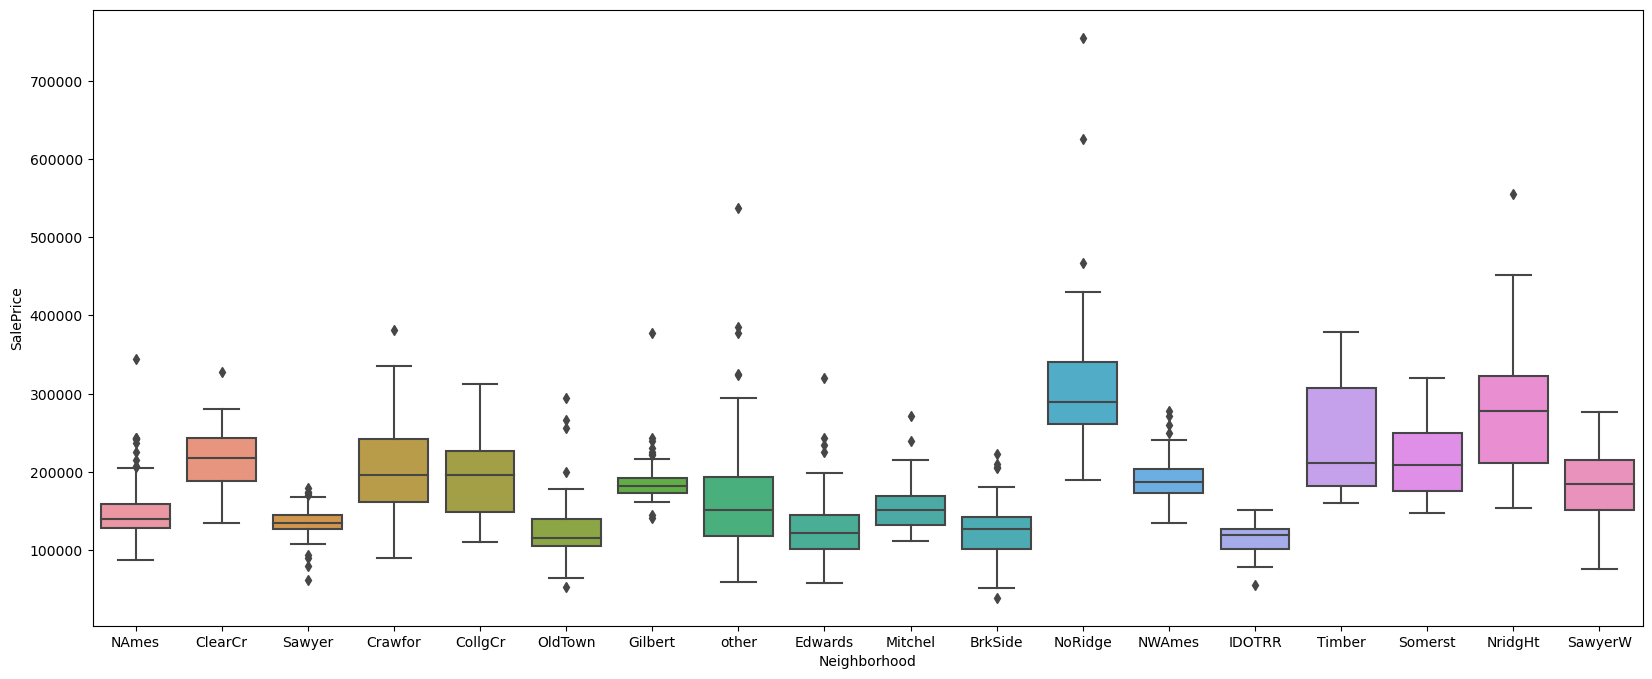

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20, 8))
sns.boxplot(x='Neighborhood', y= 'SalePrice', data = Housing_Data)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

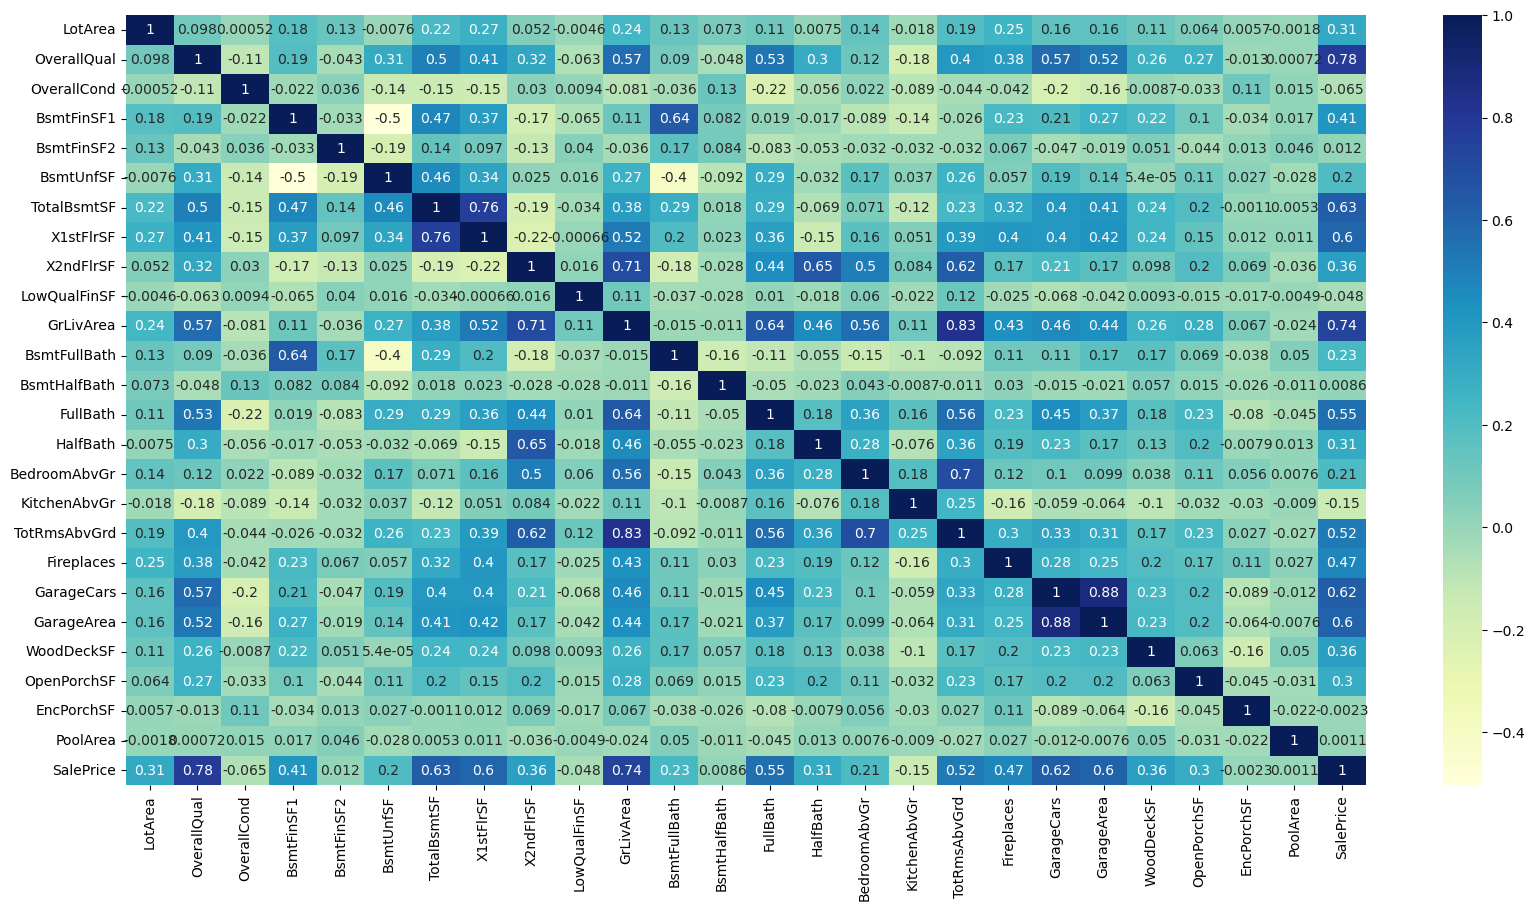

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for numeric columns only
correlation_matrix = Housing_Data.corr(numeric_only=True)

# Set the figure size before creating the heatmap
plt.figure(figsize=(20, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')

# Show the plot
plt.show()

In [15]:
import pandas as pd

# Assuming you've already loaded your dataset as Housing_data
# Housing_data = pd.read_csv('your_dataset.csv')
Housing_data=pd.read_csv('housingData (1).csv')

# Calculate correlation matrix
corr_matrix = Housing_data.corr()

# Get correlations with the target variable (e.g., 'FinalSalePrice')
target_correlations = corr_matrix['SalePrice']

# Sort correlations in descending order
sorted_correlations = target_correlations.sort_values(ascending=False)

# Print correlations for all variables
print('\nCorrelation with FinalSalePrice for all variables (sorted):')
for variable, correlation in sorted_correlations.iteritems():
    print(f'{variable}: {correlation:.2f}')


Correlation with FinalSalePrice for all variables (sorted):
SalePrice: 1.00
OverallQual: 0.78
GrLivArea: 0.74
TotalBsmtSF: 0.63
GarageCars: 0.62
GarageArea: 0.60
X1stFlrSF: 0.60
FullBath: 0.55
TotRmsAbvGrd: 0.52
YearBuilt: 0.50
Fireplaces: 0.47
YearRemodAdd: 0.46
GarageYrBlt: 0.45
MasVnrArea: 0.45
BsmtFinSF1: 0.41
WoodDeckSF: 0.36
X2ndFlrSF: 0.36
LotFrontage: 0.33
LotArea: 0.31
HalfBath: 0.31
OpenPorchSF: 0.30
BsmtFullBath: 0.23
BedroomAbvGr: 0.21
BsmtUnfSF: 0.20
Id: 0.02
BsmtFinSF2: 0.01
MoSold: 0.01
BsmtHalfBath: 0.01
YrSold: 0.01
PoolArea: 0.00
EncPorchSF: -0.00
LowQualFinSF: -0.05
MiscVal: -0.05
MSSubClass: -0.05
OverallCond: -0.06
KitchenAbvGr: -0.15


C:\Users\Computer\AppData\Local\Temp\ipykernel_8236\2931955361.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Housing_data.corr()
C:\Users\Computer\AppData\Local\Temp\ipykernel_8236\2931955361.py:18: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for variable, correlation in sorted_correlations.iteritems():


In [16]:
# Assuming Housing_data is your existing DataFrame
columns_to_remove = ['Id', 'BsmtFinSF2', 'MoSold', 'BsmtHalfBath', 'EncPorchSF', 'LowQualFinSF', 'MiscVal', 'MSSubClass', 'KitchenAbvGr']

# Create a new DataFrame without the specified columns
Housing_data_updated = Housing_data.drop(columns=columns_to_remove)

# Save the updated DataFrame to a new CSV file
Housing_data_updated.to_csv('Housing_data_updated.csv', index=False)

Regression Plots: Creating regression plots between the most correlated variables and Sale Price can provide a visual representation of the relationship between these variables and the target. These plots depict the trend line and the scatter of data points, making it easier to understand the nature of the relationship, whether it's linear, quadratic, etc.

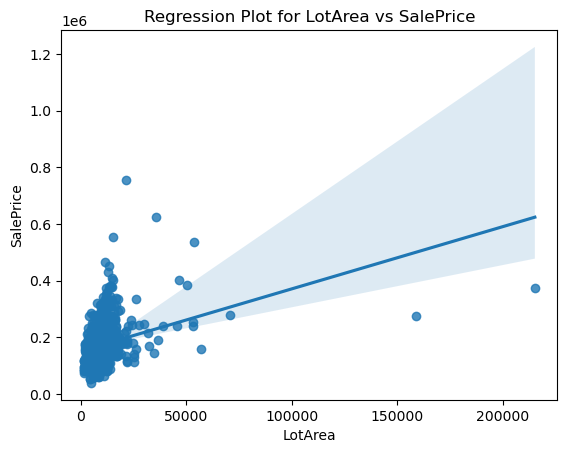

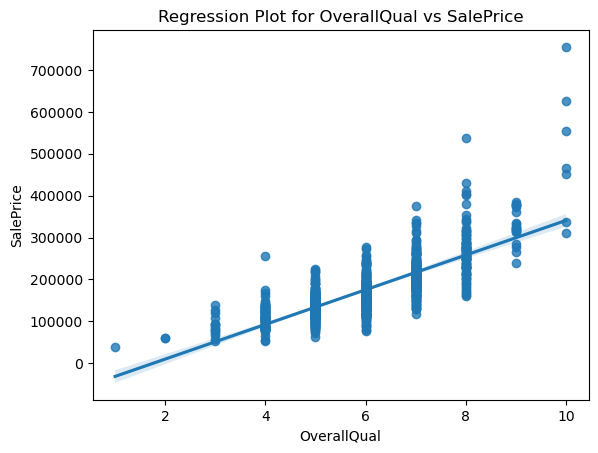

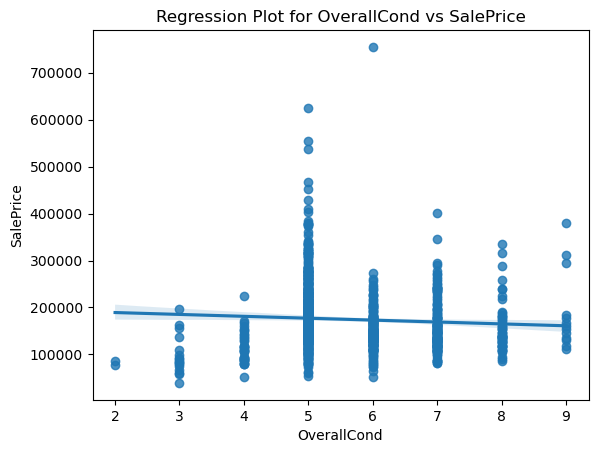

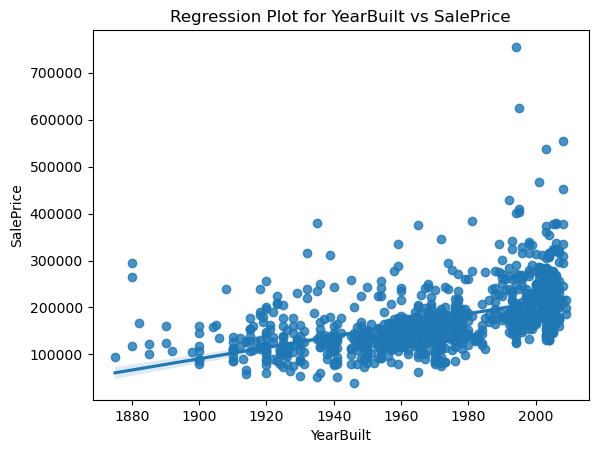

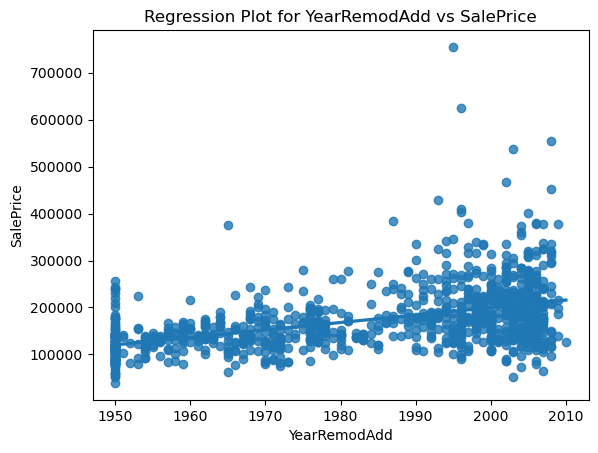

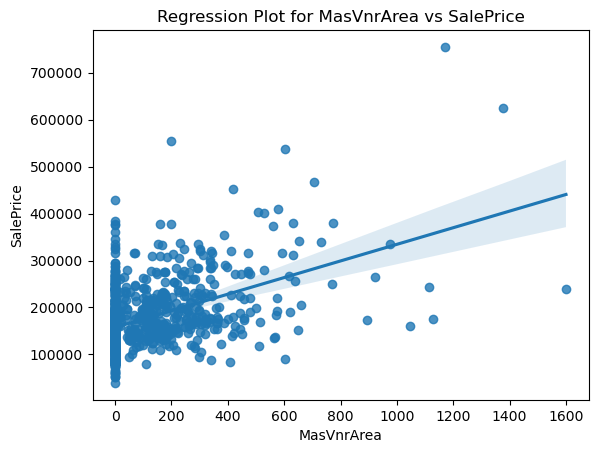

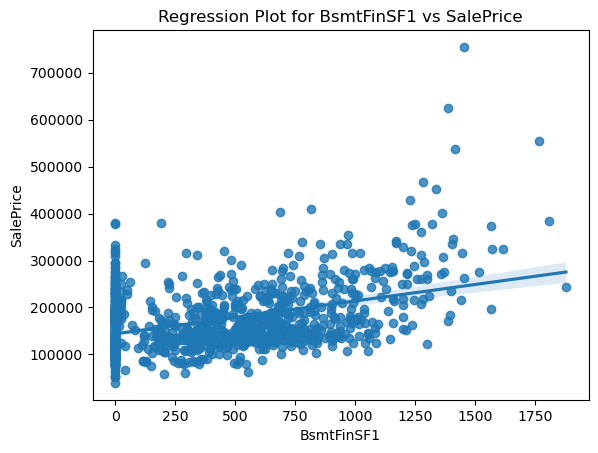

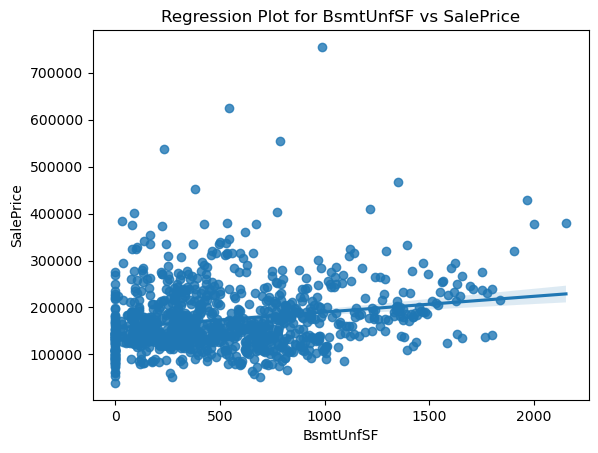

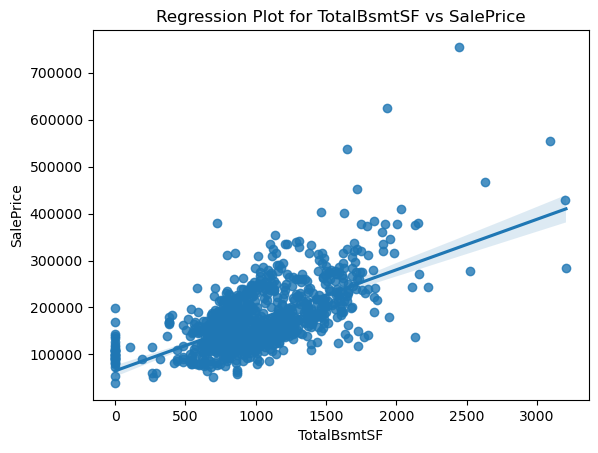

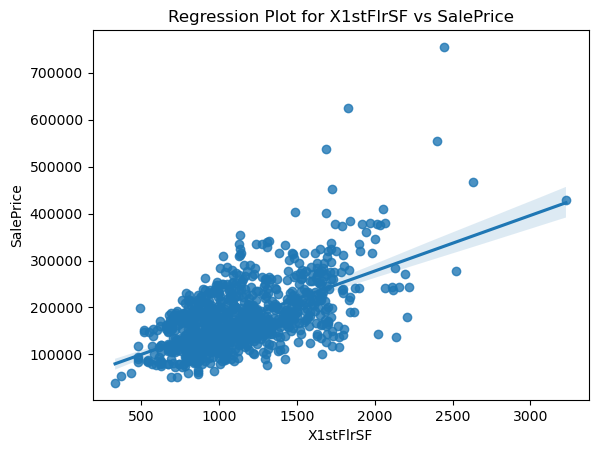

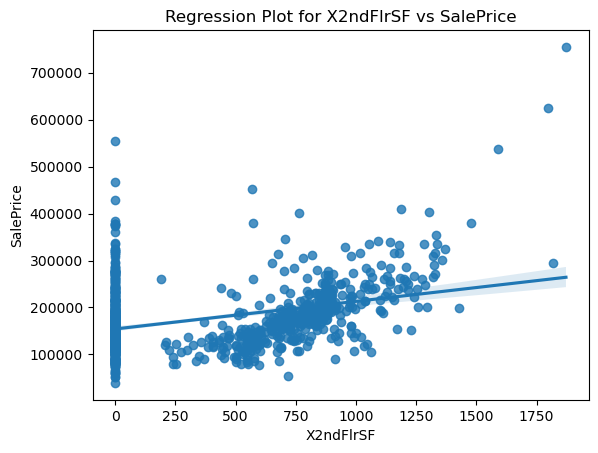

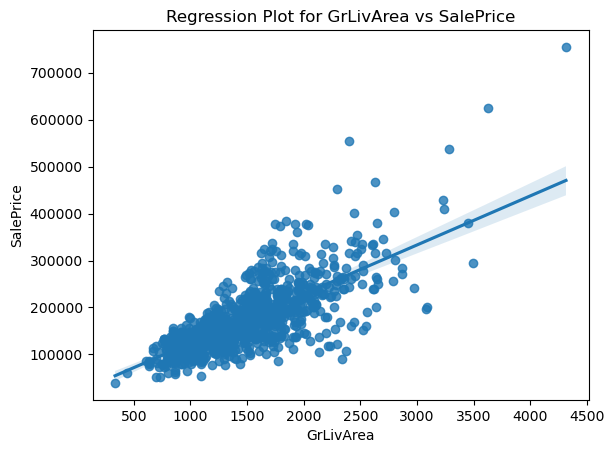

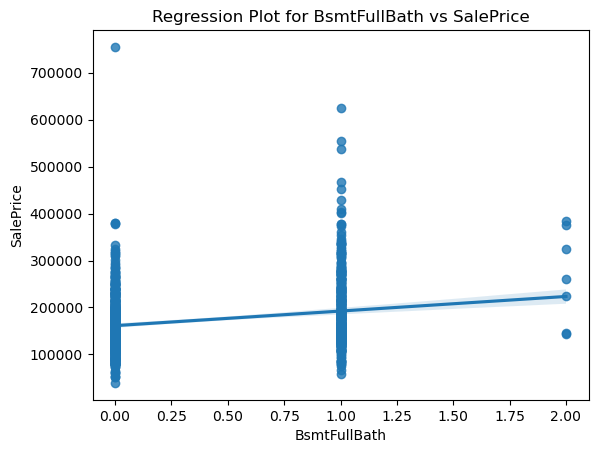

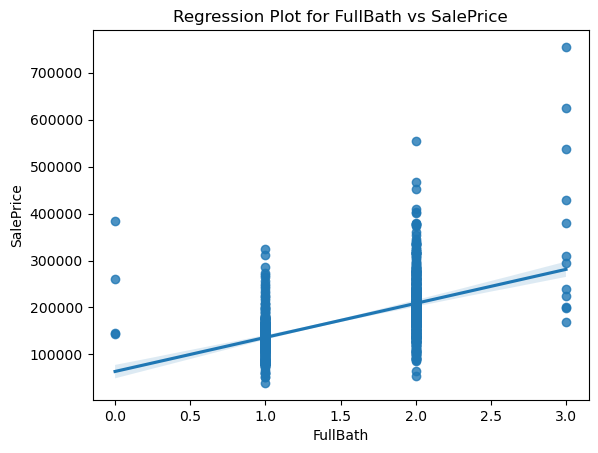

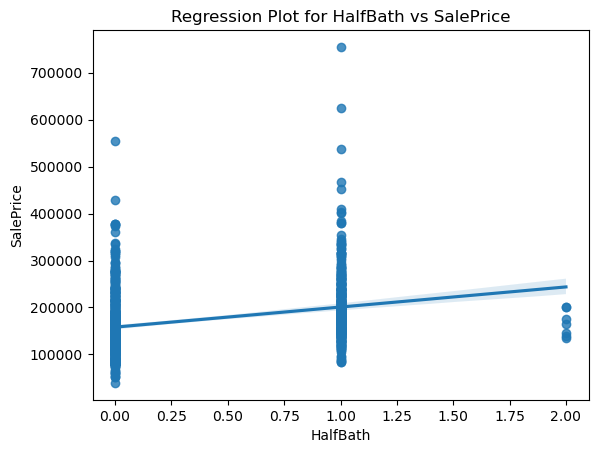

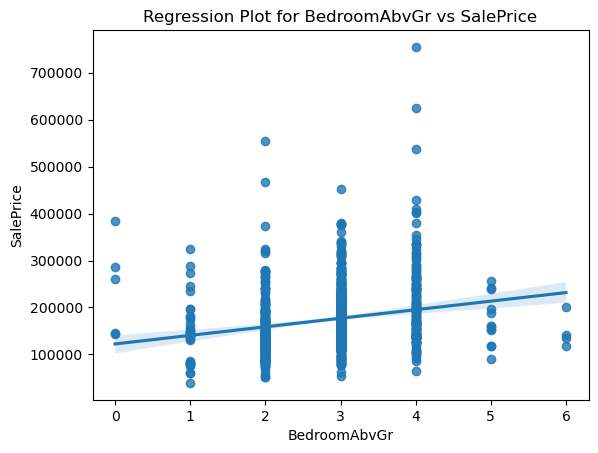

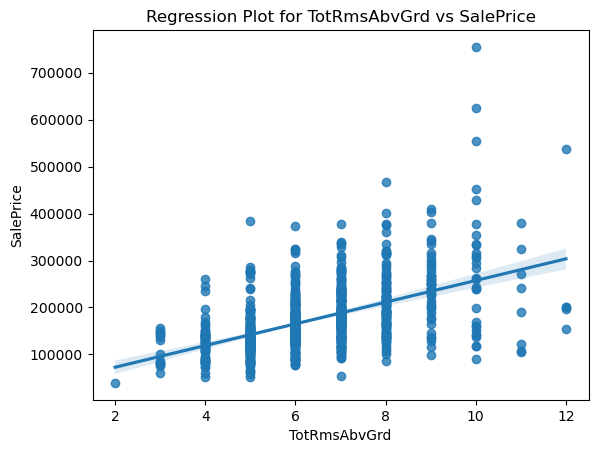

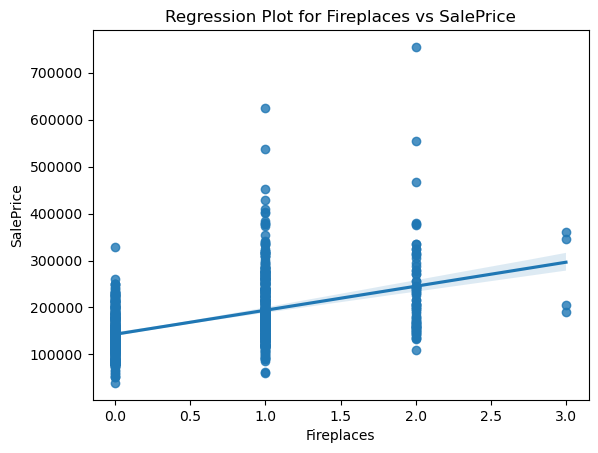

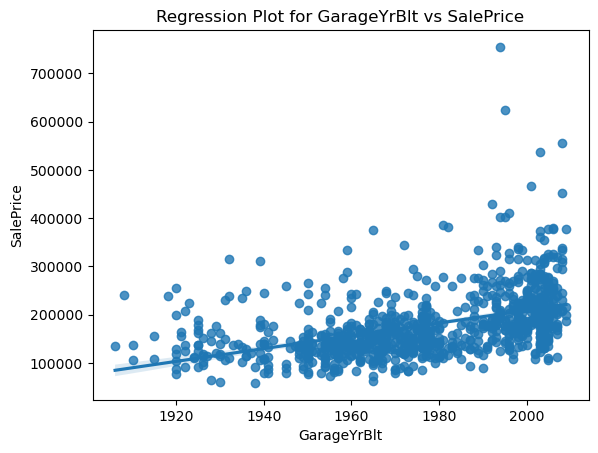

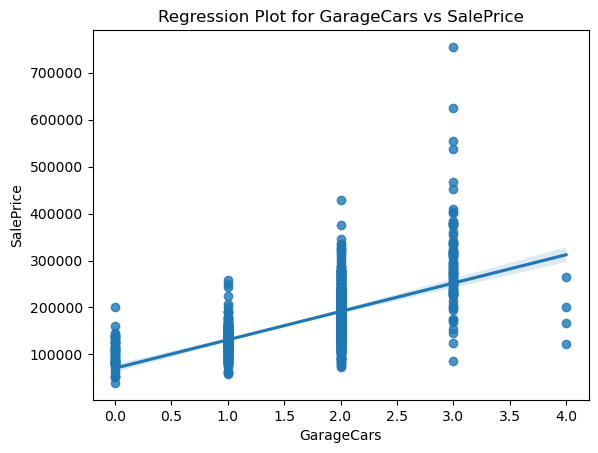

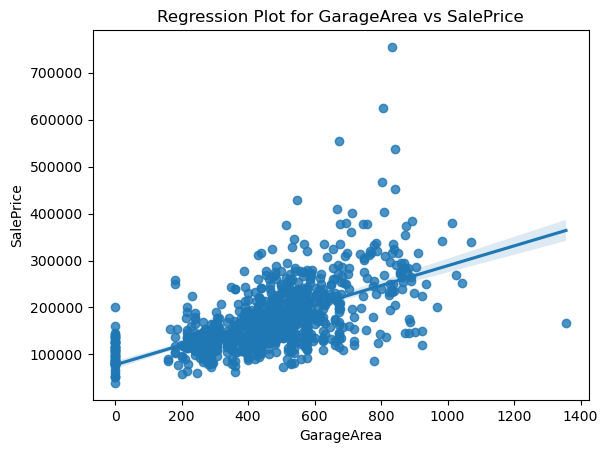

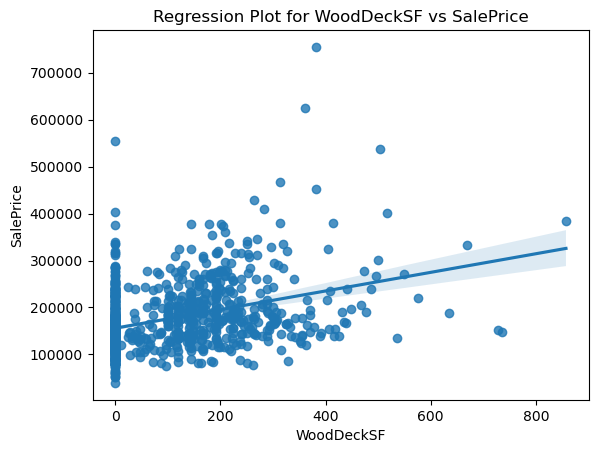

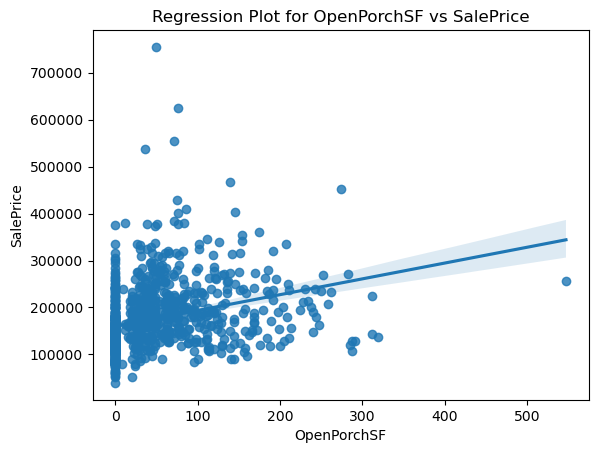

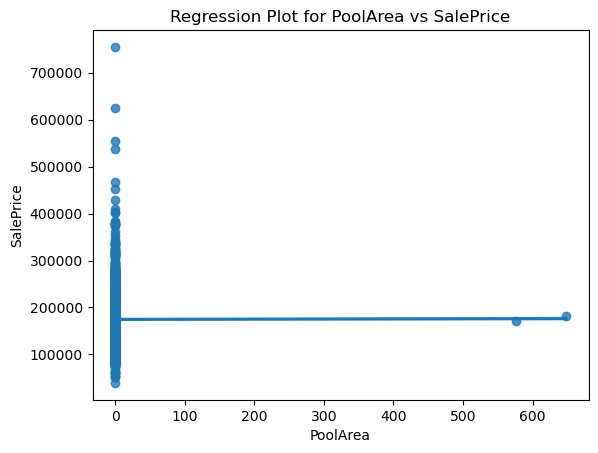

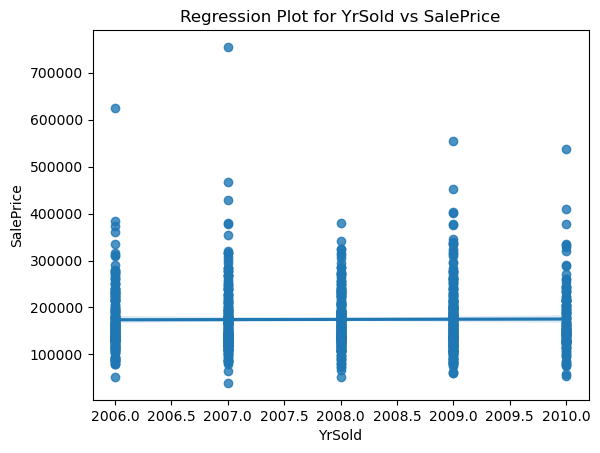

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columns to be included
included_cols = ['LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
                 'TotalBsmtSF', 'X1stFlrSF', 'X2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
                 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
                 'OpenPorchSF', 'PoolArea', 'YrSold']

# Assuming 'Housing_data' is the name of your dataframe

for col in included_cols:
    sns.regplot(x=col, y='SalePrice', data=Housing_data)
    plt.title(f'Regression Plot for {col} vs SalePrice')
    plt.show()

Parallel Coordinates Plot: This plot is helpful for visualizing multivariate data. Each variable forms a vertical axis, and lines are drawn to connect the values of the variables for each data point. This can provide an overview of how multiple variables collectively impact the sale price and potentially reveal patterns or clusters within the data.

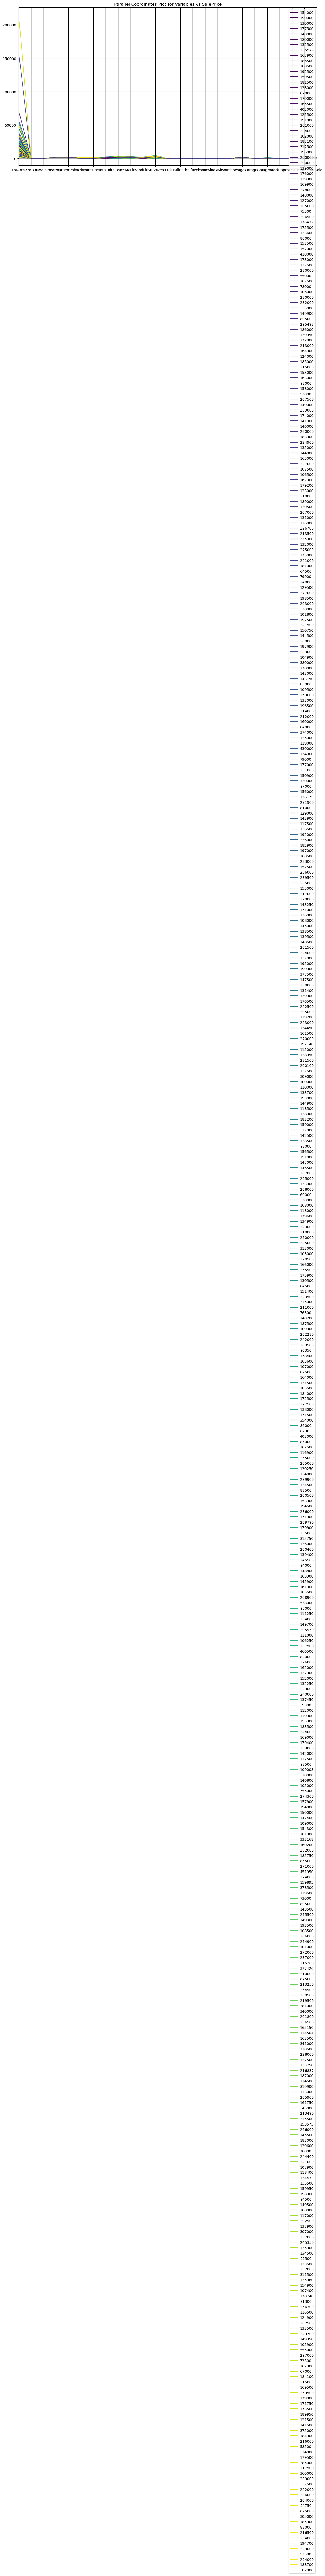

In [25]:
from pandas.plotting import parallel_coordinates

# Select the columns you want to include in the parallel coordinates plot
included_cols = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
                 'TotalBsmtSF', 'X1stFlrSF', 'X2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
                 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
                 'OpenPorchSF', 'PoolArea', 'YrSold']

# Create the parallel coordinates plot
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
parallel_coordinates(Housing_data[included_cols + ['SalePrice']], 'SalePrice', colormap='viridis')
plt.title('Parallel Coordinates Plot for Variables vs SalePrice')
plt.show()

In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load your data
housing_data_path = "housingData (1).csv"
housing_data = pd.read_csv(housing_data_path)

# Columns to drop
columns_to_drop = ['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'Alley', 'Id', 'BsmtFinSF2', 'MoSold', 'BsmtHalfBath', 'EncPorchSF', 'LowQualFinSF', 'MiscVal', 'MSSubClass', 'KitchenAbvGr']
housing_data = housing_data.drop(columns=columns_to_drop, axis=1)

# Columns to impute
columns_to_impute = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for column in columns_to_impute:
    housing_data[column].fillna(housing_data[column].mode()[0], inplace=True)

# Separate features and target variable
X = housing_data.drop('SalePrice', axis=1)
y = housing_data['SalePrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Define numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define numerical transformer
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputation for missing values using mean
    ('scaler', StandardScaler())  # Standardizing numerical features
])

# Define categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputation for missing values using mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding for categorical features
])

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'X1stFlrSF',
       'X2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'Bedroom...
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

In [5]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their ranges to search
param_grid = {
    'regressor__fit_intercept': [True, False]
    # Modify other hyperparameters here for tuning
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator for prediction
# You can also check the performance using grid_search.best_score_

# Example of prediction with the best estimator
predictions = best_estimator.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)


Best Parameters: {'regressor__fit_intercept': False}
Best Estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'X1stFlrSF',
       'X2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'Bedroom...
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'El

In [9]:
# Define the list of features used in your dataset
numerical_features = ['LotArea', 'OverallQual','OverallCond','MasVnrArea', 'YearBuilt', 'YearRemodAdd','MassVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','X1stFlrSF','X2ndFlrSF','GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF','OpenPorchSF','PoolArea','YrSold']  # Replace these with your numerical features
categorical_features = ['MSZoning', 'LotShape','LandContour','LotConfig','LandSlope', 'Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType']  # Replace these with your categorical features

new_house = {}

# Get numerical feature values from user input
for feature in numerical_features:
    value = input(f"Enter the value for {feature}: ")
    new_house[feature] = float(value) if '.' in value else int(value)

# Get categorical feature values from user input
for feature in categorical_features:
    value = input(f"Enter the value for {feature}: ")
    new_house[feature] = value

# Create a DataFrame with the user input data
new_house_data = pd.DataFrame([new_house])

# Preprocess the user input using the preprocessor defined in the training code
new_house_preprocessed = preprocessor.transform(new_house_data)

# Function to get predictions for a new house using the best estimator
def get_predictions(model, new_house_preprocessed):
    predicted_price = model.predict(new_house_preprocessed)
    return predicted_price[0]

# Example of using the best estimator for prediction
predicted_price = get_predictions(best_estimator, new_house_preprocessed)
print(f"The rough estimated sale price for the new house is: ${predicted_price:.2f}")

Enter the value for LotArea:  6567
Enter the value for OverallQual:  465
Enter the value for OverallCond:  244
Enter the value for MasVnrArea:  134
Enter the value for YearBuilt:  135
Enter the value for YearRemodAdd:  461
Enter the value for MassVnrArea:  65
Enter the value for BsmtFinSF1:  345
Enter the value for BsmtUnfSF:  13
Enter the value for TotalBsmtSF:  46
Enter the value for X1stFlrSF:  556
Enter the value for X2ndFlrSF:  64
Enter the value for GrLivArea:  1
Enter the value for BsmtFullBath:  45
Enter the value for FullBath:  24
Enter the value for HalfBath:  445
Enter the value for BedroomAbvGr:  21
Enter the value for TotRmsAbvGrd:  21
Enter the value for Fireplaces:  21
Enter the value for GarageYrBlt:  213
Enter the value for GarageCars:  23
Enter the value for GarageArea:  45
Enter the value for WoodDeckSF:  67
Enter the value for OpenPorchSF:  89
Enter the value for PoolArea:  78
Enter the value for YrSold:  90
Enter the value for MSZoning:  98
Enter the value for LotS

ValueError: X has 174 features, but ColumnTransformer is expecting 58 features as input.

In [23]:
Housing_Data.Neighborhood.value_counts()

NAmes      167
CollgCr    113
other       85
OldTown     73
Edwards     72
Sawyer      55
NWAmes      54
Gilbert     52
SawyerW     45
Somerst     44
BrkSide     40
Mitchel     39
NridgHt     35
Crawfor     32
NoRidge     31
ClearCr     22
IDOTRR      21
Timber      20
Name: Neighborhood, dtype: int64

In [25]:
Housing_Data.RoofStyle.value_counts()

Gable    795
Hip      184
other     21
Name: RoofStyle, dtype: int64

## Feature Engineering

In [55]:
Housing_Data = Housing_Data.drop(['Id', 'MSSubClass', 'GarageYrBlt', 'MiscVal', 'YrSold', 'YearBuilt', 
                                  'MoSold', 'YearRemodAdd','MasVnrArea'], axis=1) 


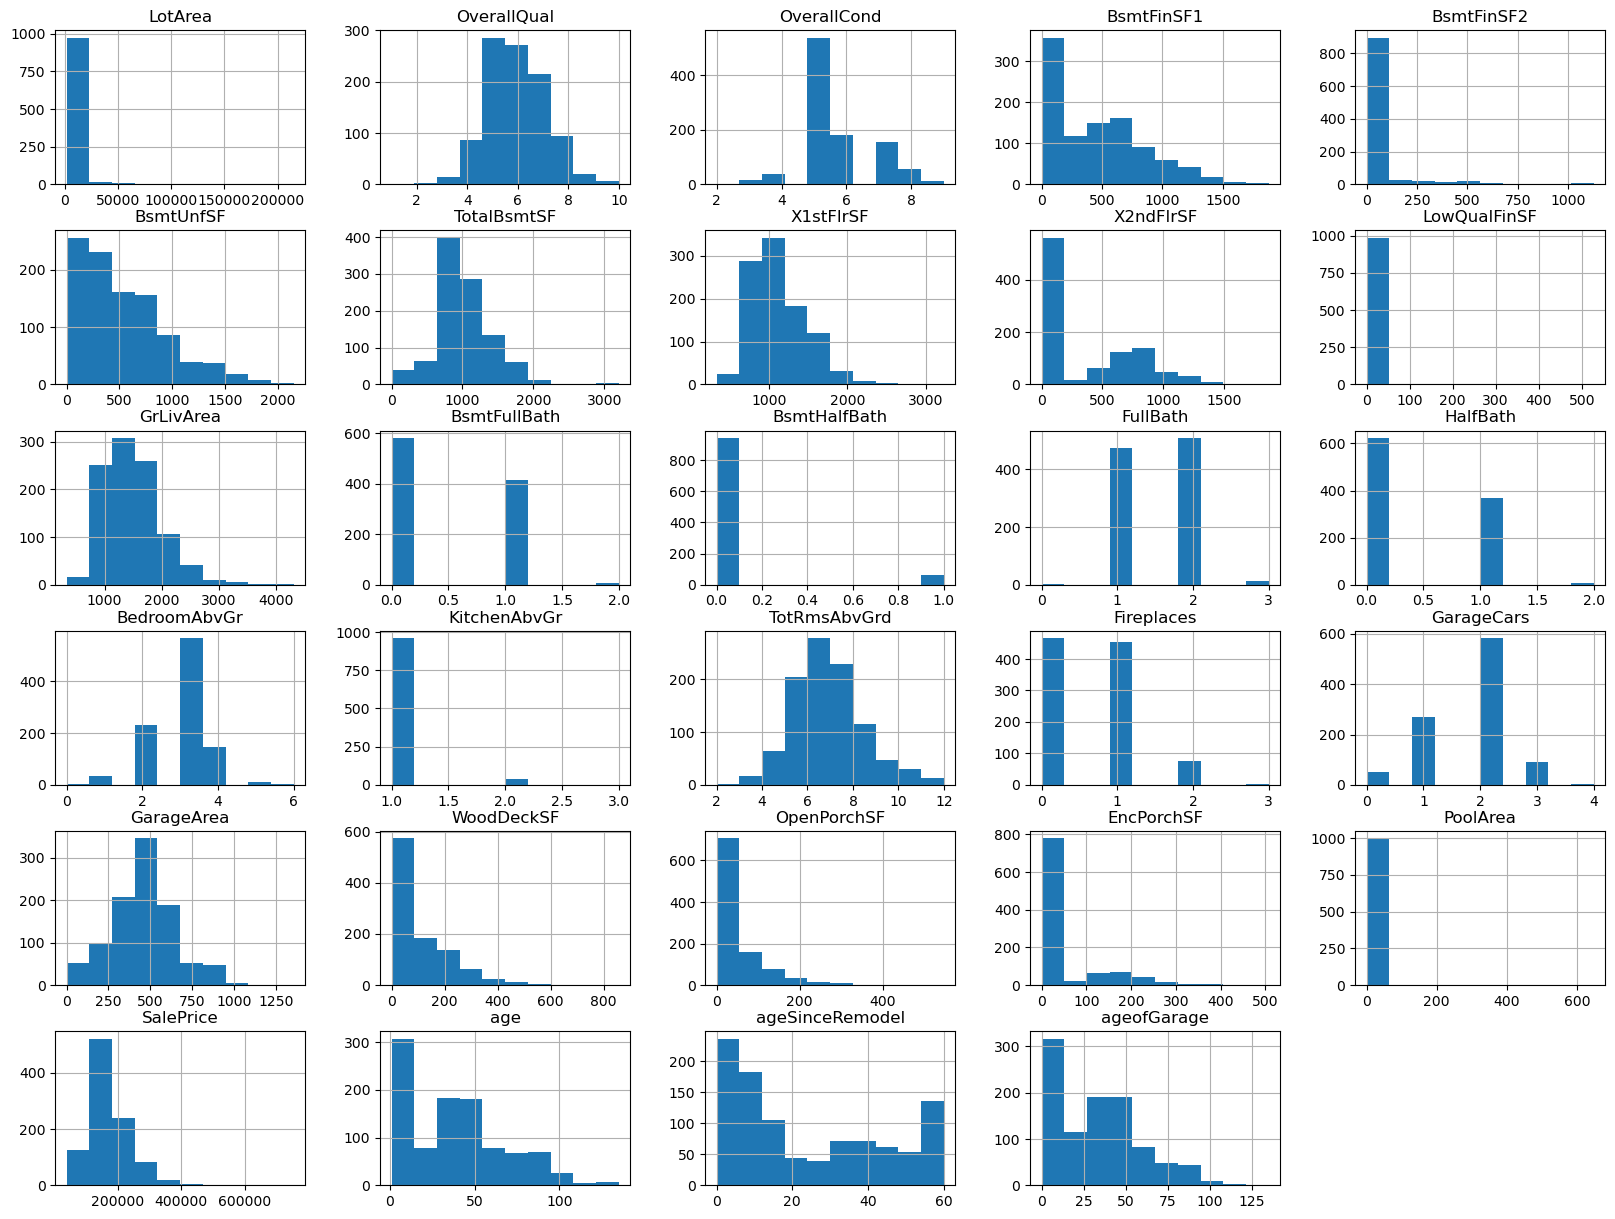

In [75]:
missing_count=Housing_Data.isnull().sum()
missing_percentage=(missing_count/len(Housing_Data))*100
missing_data_summary=pd.DataFrame({'Column Name':missing_count.index,'Missing Count':missing_count.values,'Missing Percentage':missing_percentage.values})
missing_data_summary=missing_data_summary[missing_data_summary['Missing Count']>0]
print(missing_data_summary)

Empty DataFrame
Columns: [Column Name, Missing Count, Missing Percentage]
Index: []
